In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as pltt

In [16]:
# Read dataset
dataset = pd.read_csv(open("../dataset-ispq.csv"), delimiter=';')
dataset_size = dataset.shape[0]
attributes = list(dataset.columns.values)

print("The dataset has {} entries with {} attributes:\n{}".format(dataset_size, len(attributes), attributes))

# colonne:
#
#  DEFAULT_FLAG_rett_fact
#    Booleano attivo se il soggetto ha dichiarato default
#
#  perf_year
#    Anno in cui è stata fatta la rilevazione
#
#  SETTORE_INT
#    Settore industriale del soggetto
#
#  classe_indic_dim
#    Suddivisione del soggetto in classi create sulla base delle sue risorse economiche
#
#  MACRO_AREA_2b
#    Area geografica del soggetto 
#  
#  score_quant_integrato
#    Score del soggetto
#
#  ID_Fittizio
#    Id del soggetto

The dataset has 595234 entries with 7 attributes:
['DEFAULT_FLAG_rett_fact', 'perf_year', 'SETTORE_INT', 'classe_indic_dim', 'MACRO_AREA_2b', 'score_quant_integrato', 'ID_Fittizio']


In [17]:
# ID_Fittizio

subjects = dataset['ID_Fittizio'].unique()

# Check for missing ID
assert subjects[-1] == (len(subjects)), "Missing ID"

print('There are {} subjects with an average of {:.2f} measures per subject'.format(len(subjects), dataset_size/len(subjects)))

There are 161510 subjects with an average of 3.69 measures per subject


Number of default predicted: 21399/595234 (3.60%)


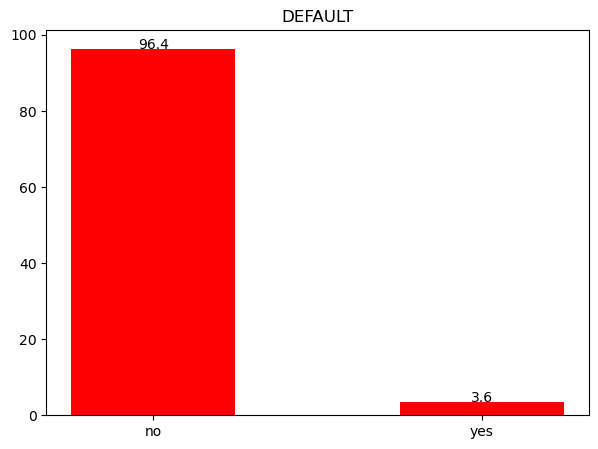

In [18]:
# DEFAULT ATTRIBUTE

# check for not admitted values (only 0 and 1 are valid)
for el in dataset['DEFAULT_FLAG_rett_fact']:
    assert el != 0 or el != 1, "Default flag error: value not admitted"

no_default = dataset['DEFAULT_FLAG_rett_fact'].value_counts()[0]
yes_default = dataset['DEFAULT_FLAG_rett_fact'].value_counts()[1]
print('Number of default predicted: {}/{} ({:.2f}%)'.format(yes_default, dataset_size, yes_default/dataset_size*100))

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

x_def = ['no', 'yes']
y_def = [round(no_default/dataset_size*100, 2), round(yes_default/dataset_size*100, 2)]

plt.figure(figsize=(7,5))
plt.bar(x_def, y_def, color='red', width=0.5)
addlabels(x_def, y_def)
plt.title('DEFAULT')
plt.show()

Oldest sample's year: 2012, Newer sample's year: 2020, Range: 9 years


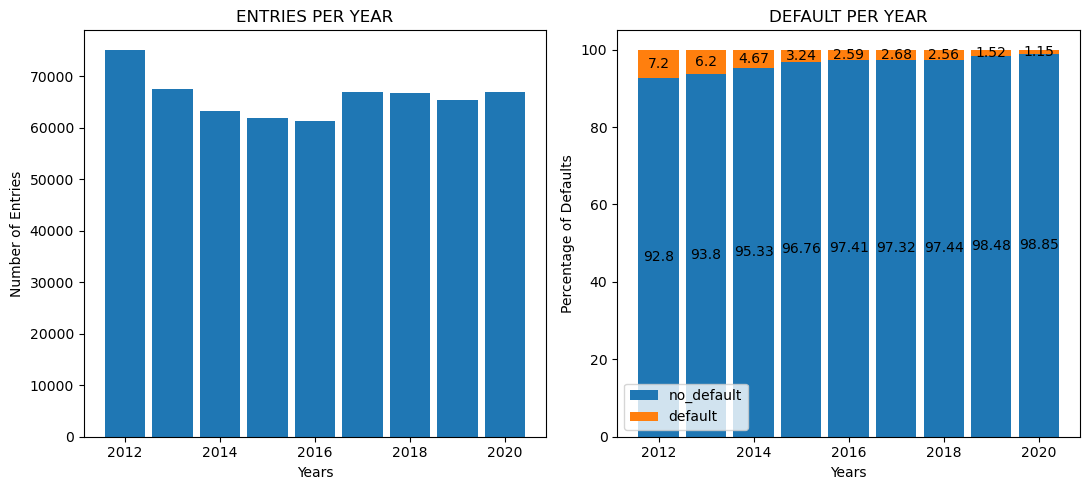

In [39]:
# PERF_YEAR attribute

# Retreive the records' years
samples_per_year = dict(sorted(dataset['perf_year'].value_counts().items()))
years = list(samples_per_year.keys())
start_year = min(years)
end_year = max(years)
print("Oldest sample's year: {}, Newer sample's year: {}, Range: {} years".format(start_year, end_year, end_year-start_year+1))

# COUNT DEFAULT PER YEAR (number of entries and percentage per year)
default = np.zeros(len(years))
no_default = np.zeros(len(years))
default_100 = np.zeros(len(years))
no_default_100 = np.zeros(len(years))

yearsVSdefault = dict(dataset.groupby(['perf_year','DEFAULT_FLAG_rett_fact'])['perf_year'].count())
for (y,d),val in yearsVSdefault.items():
    if d == 0:
        no_default[y-start_year] = val
        no_default_100[y-start_year] = round(val/samples_per_year[y]*100, 2)
    else:
        default[y-start_year] = val
        default_100[y-start_year] = round(val/samples_per_year[y]*100, 2)

defaultVSyears = {
    'no_default': no_default,
    'default': default,
}
defaultVSyears_100 = {
    'no_default': no_default_100,
    'default': default_100,
}

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

# PLOT 1: ENTRIES PER YEAR
ax1.bar(years, samples_per_year.values(), width=0.85)
ax1.set_title('ENTRIES PER YEAR')
ax1.set_xlabel('Years')
ax1.set_ylabel('Number of Entries')

# PLOT 2: DEFAULT PER YEAR
bottom = np.zeros(len(years))
for k, v in defaultVSyears_100.items():
    p = ax2.bar(years, v, 0.85, label=k, bottom=bottom)
    bottom += v
    ax2.bar_label(p, label_type='center')

ax2.set_title('DEFAULT PER YEAR')
ax2.set_xlabel('Years')
ax2.set_ylabel('Percentage of Defaults')
ax2.legend()

# Show the plots
plt.tight_layout()
plt.show()

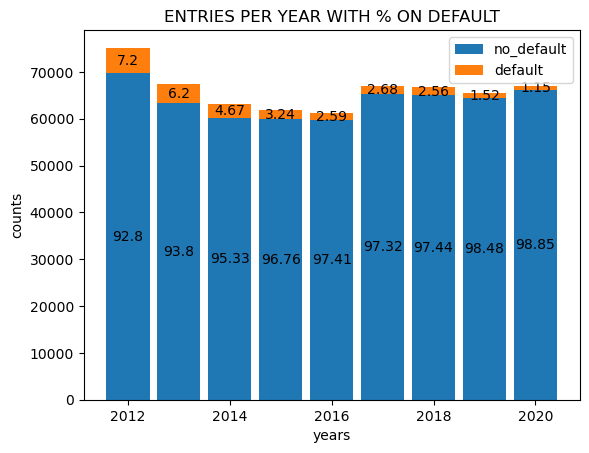

In [44]:
# ENTRIES PER YEAR WITH PERCENTAGE ON DEFAULT
fig, ax = plt.subplots()
bottom = np.zeros(len(years))

y = 2012
for k,v in defaultVSyears.items():
    bar = ax.bar(years, v, 0.85, label=k, bottom=bottom)
    bottom += v
    if k =='no_default':
        ax.bar_label(bar, labels=no_default_100, label_type='center', fmt='%.2f')
    else:
        ax.bar_label(bar, labels=default_100, label_type='center', fmt='%.2f')
    
ax.set_title('ENTRIES PER YEAR WITH % ON DEFAULT')
ax.set_xlabel('years')
ax.set_ylabel('counts')
ax.legend()
plt.show()

There are 24 business sectors:


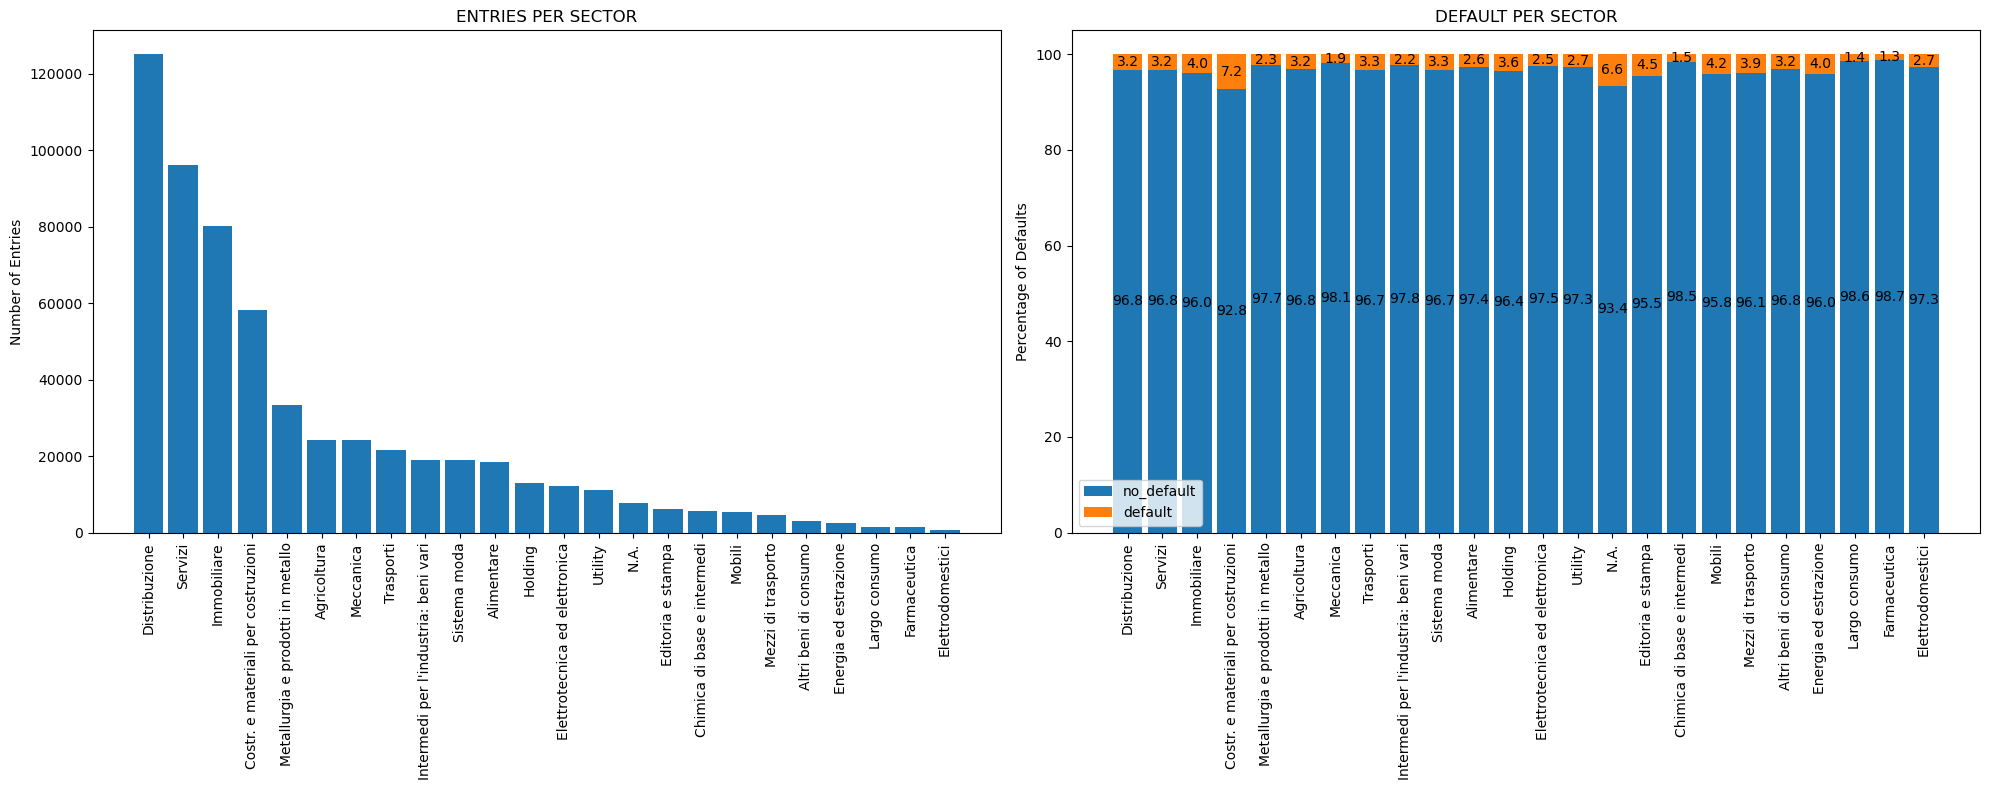

In [95]:
# SETTORE_INT

# Count how many sectors we have
sectors_counts = dataset['SETTORE_INT'].value_counts()
sectors = list(sectors_counts.keys())
print('There are {} business sectors:'.format(len(sectors_counts)))

# COUNT DEFAULT PER SECTOR
default_4_sector = np.zeros(len(sectors))
no_defaul_4_sector = np.zeros(len(sectors))
default_4_sector_100 = np.zeros(len(sectors))
no_default_4_sector_100 = np.zeros(len(sectors))

sectorsVSdefault = dataset.groupby(['SETTORE_INT','DEFAULT_FLAG_rett_fact'])['SETTORE_INT'].count()

for i, k in enumerate(sectors):
    default_4_sector[i] = sectorsVSdefault[k][1]
    no_defaul_4_sector[i] = sectorsVSdefault[k][0]
    default_4_sector_100[i] = default_4_sector[i] / sectors_counts[k] * 100
    no_default_4_sector_100[i] = no_defaul_4_sector[i] / sectors_counts[k] * 100
    
defaultVSsectors = {
    'no_default': no_defaul_4_sector,
    'default': default_4_sector,
}
defaultVSsectors_100 = {
    'no_default': no_default_4_sector_100,
    'default': default_4_sector_100,
}

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# PLOT 1: ENTRIES PER YEAR
ax1.bar(sectors, sectors_counts, width=0.85)
ax1.set_title('ENTRIES PER SECTOR')
ax1.set_xticks(range(len(sectors)))
ax1.set_xticklabels(sectors, rotation=90)
ax1.set_ylabel('Number of Entries')

# PLOT 2: DEFAULT PER SECTOR
bottom = np.zeros(len(sectors))
for k, v in defaultVSsectors_100.items():
    p = ax2.bar(sectors, v, 0.85, label=k, bottom=bottom)
    bottom += v
    ax2.bar_label(p, label_type='center', fmt='%.1f')

ax2.set_title('DEFAULT PER SECTOR')
ax2.set_xticks(range(len(sectors)))
ax2.set_xticklabels(sectors, rotation=90)
ax2.set_ylabel('Percentage of Defaults')
ax2.legend()

# Show the plots
plt.tight_layout()
plt.show()

There are 4 classes of revenue:


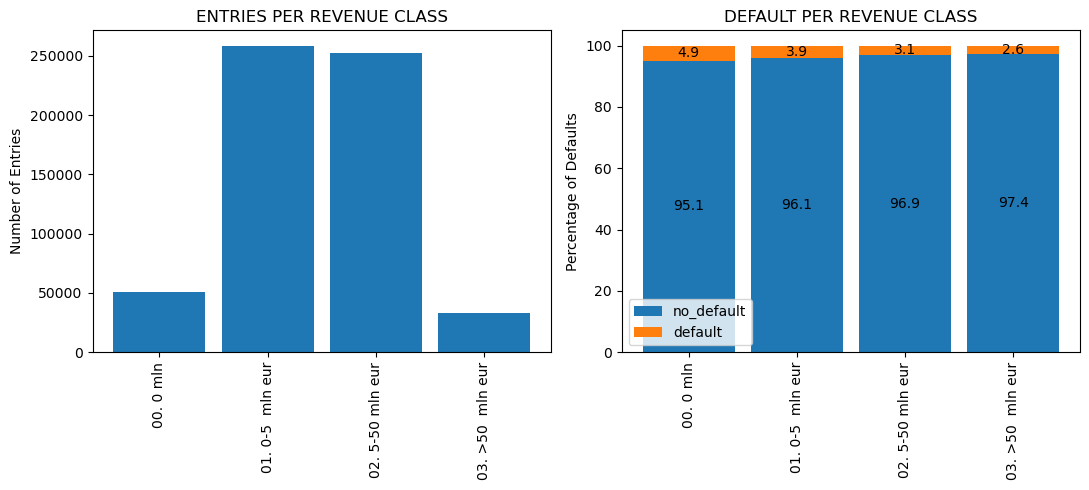

In [128]:
#  classe_indic_dim

# Count how many revenue classes we have
# revenue_counts = dataset['classe_indic_dim'].value_counts()
# rev_classes = list(dict(sorted(revenue_counts.items())).keys())
revenue_counts = dataset['classe_indic_dim'].value_counts()
sorted_revenue_calsses = dict(sorted(revenue_counts.items()))
rev_classes = list(sorted_revenue_calsses.keys())
print('There are {} classes of revenue:'.format(len(rev_classes)))

# COUNT DEFAULT PER REVENUE
def_4_rev = np.zeros(len(rev_classes))
no_def_4_rev = np.zeros(len(rev_classes))
def_4_rev_100 = np.zeros(len(rev_classes))
no_def_4_rev_100 = np.zeros(len(rev_classes))

revenueVSdefault = dataset.groupby(['classe_indic_dim','DEFAULT_FLAG_rett_fact'])['classe_indic_dim'].count()

for i, k in enumerate(rev_classes):
    def_4_rev[i] = revenueVSdefault[k][1]
    no_def_4_rev[i] = revenueVSdefault[k][0]
    def_4_rev_100[i] = def_4_rev[i] / revenue_counts[k] * 100
    no_def_4_rev_100[i] = no_def_4_rev[i] / revenue_counts[k] * 100

defaultVSrevenue = {
    'no_default': no_def_4_rev,
    'default': def_4_rev,
}
defaultVSrevenue_100 = {
    'no_default': no_def_4_rev_100,
    'default': def_4_rev_100,
}

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

# PLOT 1: ENTRIES PER YEAR
ax1.bar(rev_classes, sorted_revenue_calsses.values(), width=0.85)
ax1.set_title('ENTRIES PER REVENUE CLASS')
ax1.set_xticks(range(len(rev_classes)))
ax1.set_xticklabels(rev_classes, rotation=90)
ax1.set_ylabel('Number of Entries')

# PLOT 2: DEFAULT PER SECTOR
bottom = np.zeros(len(rev_classes))
for k, v in defaultVSrevenue_100.items():
    p = ax2.bar(rev_classes, v, 0.85, label=k, bottom=bottom)
    bottom += v
    ax2.bar_label(p, label_type='center', fmt='%.1f')

ax2.set_title('DEFAULT PER REVENUE CLASS')
ax2.set_xticks(range(len(rev_classes)))
ax2.set_xticklabels(rev_classes, rotation=90)
ax2.set_ylabel('Percentage of Defaults')
ax2.legend()

# Show the plots
plt.tight_layout()
plt.show()

There are 5 geografic areas:
{'NW': 250899, 'NE': 136163, 'CE': 109328, 'SI': 86760, 'Estero': 12084}


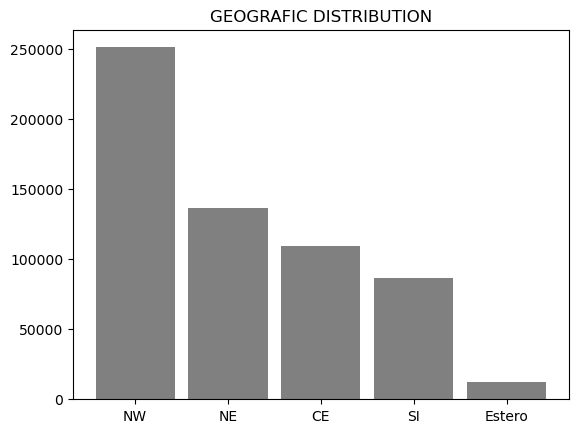

In [25]:
#  MACRO_AREA_2b

counts = dict(dataset['MACRO_AREA_2b'].value_counts())
print('There are {} geografic areas:\n{}'.format(len(counts), counts))

plt.figure()
plt.bar(counts.keys(), counts.values(), color='grey', width=0.85)
plt.title('GEOGRAFIC DISTRIBUTION')
plt.show()

Smallest score: -10.03455, largest score: 2.45948, mean: -4.330147197438317


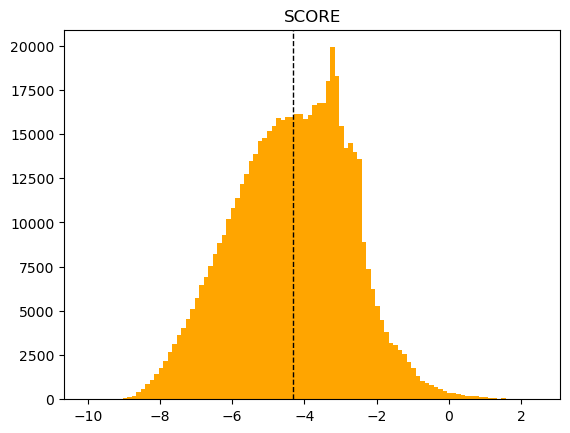

In [26]:
#  score_quant_integrato

small_score = dataset['score_quant_integrato'].min()
large_score = dataset['score_quant_integrato'].max()
mean_score = dataset['score_quant_integrato'].mean()
print("Smallest score: {}, largest score: {}, mean: {}".format(small_score, large_score, mean_score))

plt.figure()
discrete_score = plt.hist(dataset['score_quant_integrato'], bins=100, color='orange')
plt.axvline(mean_score, color='k', linestyle='dashed', linewidth=1)
plt.title('SCORE')
plt.show()

In [27]:
# Correlations

c1 = dataset['score_quant_integrato'].corr(dataset['perf_year'])
print("Correlation between score and years: {}\n".format(c1))

def my_hash(el):
    return hash(el)

geo_id = dataset['MACRO_AREA_2b'].apply(my_hash)
c2 = dataset['score_quant_integrato'].corr(geo_id)
print("Correlation between score and geographic area: {}\n".format(c2))

turnover = dataset['classe_indic_dim'].apply(my_hash)
c3 = geo_id.corr(turnover)
print("Correlation between geografic area and company turnover: {}\n".format(c3))

def_flag = dataset['DEFAULT_FLAG_rett_fact'].apply(my_hash)
c4 = dataset['score_quant_integrato'].corr(def_flag)
print("Correlation between score and default: {}".format(c4))

Correlation between score and years: -0.3005709333919465

Correlation between score and geographic area: 0.037355532961147346

Correlation between geografic area and company turnover: 0.001473832724536483

Correlation between score and default: 0.24816665740562227


In [28]:
from itertools import product
import numpy as np

def compute_density_matrix(series_a, series_b):
    label_a = list(series_a.drop_duplicates())
    label_b = list(series_b.drop_duplicates())
    density_m = np.zeros((len(label_a), len(label_b)), dtype=int)

    all_pairs = list(product(series_a, series_b))
    for i, el_a in enumerate(label_a):
        for j, el_b in enumerate(label_b):
            density_m[i,j] = all_pairs.count((el_a, el_b))
    
    return label_a, label_b, density_m

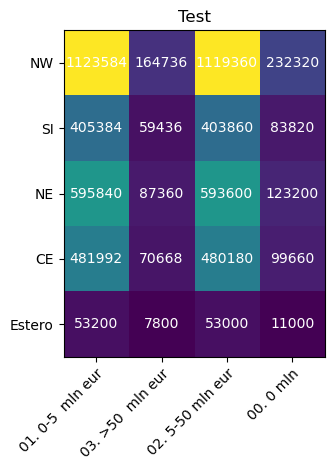

In [29]:
sample_dataset = dataset.sample(2500)
la, lb, dm = compute_density_matrix(sample_dataset['MACRO_AREA_2b'], sample_dataset['classe_indic_dim'])

fig, ax = plt.subplots()
im = ax.imshow(dm)
ax.set_xticks(np.arange(len(lb)), labels=lb)
ax.set_yticks(np.arange(len(la)), labels=la)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(la)):
    for j in range(len(lb)):
        text = ax.text(j, i, dm[i, j], ha="center", va="center", color="w")
ax.set_title("Test")
fig.tight_layout()
plt.show()